# Tech Challenge - IA para Devs: Fase 1

## Introdução e Justificativa da Escolha do Dataset

Doenças cardiovasculares representam uma das principais causas de mortalidade global, tornando a implementação de ferramentas de suporte ao diagnóstico uma necessidade real em ambientes clínicos. A capacidade de analisar um vasto volume de dados médicos e identificar padrões complexos pode otimizar a triagem de pacientes e auxiliar os profissionais de saúde na tomada de decisões informadas, agilizando processos e potencialmente salvando vidas.

Este projeto visa desenvolver a base de um sistema inteligente de suporte ao diagnóstico, utilizando técnicas de Machine Learning. Para atingir este objetivo, selecionamos o conjunto de dados ["Heart Disease Health Indicators Dataset" (Doença Cardíaca)](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset), disponível na plataforma Kaggle.

### Motivos para a Escolha do Dataset "Heart Disease Health Indicators Dataset":

1 - Relevância Clínica: A predição de doença cardíaca é um problema real com potencial para aplicações práticas em hospitais e clínicas.

2 - Natureza da Classificação: O conjunto de dados é estruturado para uma tarefa de classificação binária (presença ou ausência de doença cardíaca), que se alinha perfeitamente com o requisito do desafio de realizar um diagnóstico "a pessoa tem ou não uma doença". Isso permite a aplicação direta de diversos algoritmos de Machine Learning focados em classificação.

3 - Variedade de Atributos: O dataset contém uma série de atributos clínicos e demográficos relevantes (como idade, sexo, tipo de dor no peito, pressão arterial, colesterol, entre outros), que são comumente utilizados na prática médica para avaliar o risco cardiovascular. Esta riqueza de informações permitirá explorar a influência de diferentes fatores no diagnóstico.

4 - Disponibilidade e Acessibilidade: Sendo um dataset público e amplamente utilizado na comunidade de Machine Learning, facilita a validação e a comparação de resultados, além de possuir uma estrutura fácil que favorece a aplicação dos conceitos propostos no Tech Challenge.

### O que se Pretende Descobrir com Este Dataset:

Com a utilização do dataset "Heart Disease Health Indicators Dataset", este projeto pretende descobrir e validar:

1 - Modelos Preditivos Eficazes: O principal objetivo é desenvolver modelos de Machine Learning capazes de prever com alta acurácia a presença de doença cardíaca em indivíduos, com base em suas características clínicas e resultados de exames.

2 - Fatores de Risco Mais Influentes: Através da análise de feature importance e outras técnicas de interpretabilidade (como SHAP, se aplicável em etapas futuras), busca-se identificar quais atributos do paciente (variáveis) são os mais relevantes e preditivos para o diagnóstico de doença cardíaca. Isso pode oferecer insights valiosos que complementem o conhecimento médico.

3 - Robustez e Viabilidade do Modelo: Avaliar a performance dos modelos utilizando métricas adequadas (como acurácia, precisão, recall e F1-score) para determinar sua robustez e potencial de aplicação prática como ferramenta de suporte ao diagnóstico em um ambiente hospitalar, sempre ressaltando que a decisão final é do profissional médico.


## Análise do Dataset: Heart Disease Health Indicators Dataset

Neste notebook, vamos realizar uma análise exploratória e construir um modelo de Machine Learning para prever doenças cardíacas com base em hábitos, estilos de vida, genética, e outras características.

Nesta análise, iremos realizar etapas de machine learning, como:

- Carregamento e exploração dos dados
- Limpeza e pré-processamento
- Modelagem (ML)
- Avaliação dos modelos
- Interpretação dos resultados

## Primeira análise dos dados

Vamos visualizar as primeiras linhas do dataset para entender as colunas disponíveis, seus tipos e possíveis problemas (valores ausentes, inconsistências, etc).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport


# Estilo de gráficos
sns.set(style="whitegrid")

# Carregar o dataset
base = pd.read_csv('https://raw.githubusercontent.com/antrafa/fiap-tech-challenge-6IADT/refs/heads/main/data/heart_disease_health_indicators_BRFSS2015.csv')

# Visualizar as primeiras linhas
base.head()

/Users/antoniorafael/workspace/Personal/ai/pos/tech-challenge/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


 ## Análise Preliminar

Abaixo estão as colunas presentes no dataset "Heart Disease and Stroke Prevention":

| Coluna                  | Descrição                                                                                               |
|-------------------------|---------------------------------------------------------------------------------------------------------|
| `HeartDiseaseorAttack`  | **Variável Alvo:** Indica se o indivíduo já teve doença cardíaca ou derrame (0 = Não, 1 = Sim).         |
| `HighBP`                | Pressão arterial alta (0 = Não, 1 = Sim).                                                               |
| `HighChol`              | Colesterol alto (0 = Não, 1 = Sim).                                                                     |
| `CholCheck`             | Checou o colesterol nos últimos 5 anos (0 = Não, 1 = Sim).                                              |
| `BMI`                   | Índice de Massa Corporal (numérico).                                                                    |
| `Smoker`                | Já fumou pelo menos 100 cigarros em toda a vida (0 = Não, 1 = Sim).                                     |
| `Stroke`                | Já teve um derrame (0 = Não, 1 = Sim).                                                                  |
| `Diabetes`              | Status de diabetes (0 = Não, 1 = Pré-diabetes, 2 = Diabetes).                                           |
| `PhysActivity`          | Fez atividade física nos últimos 30 dias (0 = Não, 1 = Sim).                                            |
| `Fruits`                | Consome frutas diariamente (0 = Não, 1 = Sim).                                                          |
| `Veggies`               | Consome vegetais diariamente (0 = Não, 1 = Sim).                                                        |
| `HvyAlcoholConsump`     | Consumo excessivo de álcool (homens >14/semana, mulheres >7/semana) (0 = Não, 1 = Sim).                 |
| `AnyHealthcare`         | Possui algum tipo de cobertura de saúde (0 = Não, 1 = Sim).                                             |
| `NoDocbcCost`           | Houve alguma vez que não procurou um médico por causa do custo (0 = Não, 1 = Sim).                      |
| `GenHlth`               | Autoavaliação da saúde geral (escala de 1 a 5, 1=Excelente, 5=Ruim).                                    |
| ``MentHlth``            | Número de dias nos últimos 30 em que a saúde mental não esteve boa (numérico, 0-30).                    |
| `PhysHlth`              | Número de dias nos últimos 30 em que a saúde física não esteve boa (numérico, 0-30).                    |
| `DiffWalk`              | Tem grande dificuldade para caminhar ou subir escadas (0 = Não, 1 = Sim).                               |
| `Sex`                   | Sexo biológico (0 = Feminino, 1 = Masculino).                                                           |
| `Age`                   | Categoria de idade (escala de 1 a 13, representando faixas etárias).                                    |
| `Education`             | Nível de escolaridade (escala de 1 a 6).                                                                |
| `Income`                | Categoria de renda (escala de 1 a 8).                                                                   |

In [8]:
base.shape

(253680, 22)

In [5]:
# Informações sobre o dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Explicação do Novo Dataset: Doença Cardíaca e Prevenção de Derrame

Este dataset, que parece ser focado em **Doença Cardíaca e Prevenção de Derrame**, apresenta características robustas e bem estruturadas para a tarefa de classificação binária (diagnosticar a presença ou ausência de doença cardíaca ou ataque).

### Características Principais:

* **Tamanho Abrangente:** O conjunto de dados contém **253.680 entradas (linhas)**. Este é um volume significativo de dados, o que é altamente benéfico para o treinamento de modelos de Machine Learning, pois permite que os algoritmos identifiquem padrões complexos de forma mais confiável e generalizem melhor.

* **Integridade dos Dados (Sem Valores Ausentes):** Uma das características mais notáveis, conforme indicado pelo `df.info()`, é que **todas as 21 colunas possuem 253.680 valores não nulos**. Isso significa que o dataset está completo e **não há valores ausentes (missing values)**. Esta é uma grande vantagem, pois elimina a necessidade de etapas de tratamento de nulos, como imputação, que poderiam introduzir viés ou complexidade.

* **Tipos de Dados Homogêneos:** Todas as colunas são do tipo `float64`. Embora muitas dessas colunas representem variáveis categóricas binárias (0 ou 1) ou ordinais (escalas), o Pandas as interpretou como números de ponto flutuante. Isso indica que, durante a fase de pré-processamento, será importante garantir que essas colunas sejam tratadas como categóricas/ordinais quando apropriado, mesmo que seus valores sejam numéricos. Por exemplo, converter 0.0/1.0 para inteiros ou até mesmo para um tipo `category` em pandas, se for para análises específicas.

* **Variável Alvo Clara:** A coluna `HeartDiseaseorAttack` é a variável alvo para este desafio. Ela provavelmente contém valores `0.0` e `1.0`, representando a ausência e a presença de doença cardíaca ou ataque, respectivamente.

### Implicações para a Análise e Pré-processamento:

A ausência de valores nulos simplifica consideravelmente o pipeline de pré-processamento. No entanto, a uniformidade dos tipos `float64` para colunas que são conceitualmente categóricas ou ordinais significa que:

1.  **Verificação de Valores Únicos:** Será crucial verificar os valores únicos em cada coluna para confirmar sua natureza (binária, ordinal ou contínua) e as codificações (por exemplo, o que 0.0 ou 1.0 realmente significam para `HighBP`, `Sex`, etc., e quais os valores nas escalas de `Age`, `Education`, `Income`).
2.  **Conversão de Tipos:** Embora não seja estritamente necessário para alguns algoritmos de ML, converter colunas como `HighBP`, `HighChol`, `Smoker`, `Stroke`, `Diabetes`, `Sex` para inteiros (`int`) ou até mesmo para o tipo `category` pode melhorar a eficiência da memória e a clareza para interpretação. Colunas como `GenHlth`, `MentHlth`, `PhysHlth`, `Age`, `Education`, `Income` são ordinais e podem ser mantidas como numéricas ou tratadas como categóricas dependendo da abordagem.
3.  **Análise de Desbalanceamento:** Dada a natureza de doenças, é altamente provável que a variável alvo `HeartDiseaseorAttack` esteja desbalanceada (muito mais "0" do que "1"). Esta será uma etapa crítica de análise e, provavelmente, de tratamento (como o SMOTE que usamos antes).
4.  **Escalonamento:** As colunas numéricas contínuas como `BMI` e as ordinais com faixas maiores (como `Age`, `Education`, `Income` ou `MentHlth`, `PhysHlth`) ainda precisarão de escalonamento (`StandardScaler` ou `MinMaxScaler`) antes de alimentar modelos sensíveis à escala.

Em suma, este dataset oferece uma base sólida e limpa para o seu projeto de Machine Learning, permitindo que o foco principal seja na modelagem e otimização para lidar com o provável desbalanceamento de classes e alcançar um alto poder preditivo, especialmente para a detecção da doença.

In [9]:
print(base.isnull().sum())

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Na saída acima podemos ver o número exato de valores nulos para cada coluna

In [14]:
# Estatísticas básicas
base.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Análise Estatística Descritiva do Novo Dataset (`df.describe()`)

O comando `describe` exibe estatísticas descritivas básicas para cada coluna numérica do dataset:

| Estatística    | Significado                                                    |
| -------------- | -------------------------------------------------------------- |
| `count`        | Quantidade de valores não nulos                                |
| `mean`         | Média (valor médio)                                            |
| `std`          | Desvio padrão (dispersão dos dados)                            |
| `min`          | Valor mínimo                                                   |
| `25%`          | Primeiro quartil (Q1) – 25% dos dados estão abaixo desse valor |
| `50%` (median) | Mediana – metade dos dados está abaixo                         |
| `75%`          | Terceiro quartil (Q3) – 75% dos dados estão abaixo desse valor |
| `max`          | Valor máximo                                                   |

---

### Observações Gerais:

* **Contagem (`count`):** Todas as colunas possuem 253.680 entradas, o que reafirma a ausência de valores nulos (já verificada com `df.info()`).

### Análise por Coluna:

A interpretação abaixo considera a provável codificação das variáveis (0/1 para binárias, escalas para ordinais), mesmo que estejam como `float64`.

1.  **`HeartDiseaseorAttack` (Variável Alvo):**
    * `mean`: `0.094186`
    * `min`: `0.0`, `max`: `1.0`
    * **Interpretação:** Confirma que é uma variável binária (0 ou 1). A média de aproximadamente `0.094` indica um **forte desbalanceamento de classes**, com cerca de 9.4% dos indivíduos tendo doença cardíaca ou ataque (a classe positiva). Isso será um ponto crítico no pré-processamento e modelagem.

2.  **`HighBP`, `HighChol`, `CholCheck`, `Smoker`, `Stroke`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`, `AnyHealthcare`, `NoDocbcCost`, `DiffWalk`, `Sex`:**
    * `min`: `0.0`, `max`: `1.0`
    * **Interpretação:** Estas são variáveis binárias (Sim/Não ou equivalente). A `mean` para cada uma representa a proporção de "1s" (a característica está presente) no dataset.
        * `HighBP` (0.429), `HighChol` (0.424), `Smoker` (0.443): Indicam que a pressão alta, colesterol alto e o hábito de fumar são prevalentes em mais de 40% da amostra.
        * `CholCheck` (0.962): Quase todos os indivíduos (96.2%) checaram o colesterol nos últimos 5 anos, o que é um bom indicador de cuidado com a saúde.
        * `Stroke` (0.040), `HvyAlcoholConsump` (0.034), `NoDocbcCost` (0.084): Indicam que derrame, consumo pesado de álcool e dificuldades em acessar médico por custo são menos comuns na amostra.
        * `PhysActivity` (0.756), `Fruits` (0.634), `Veggies` (0.720), `AnyHealthcare` (0.951): Indicam bons hábitos e acesso a saúde para a maioria.
        * `Sex` (0.440): Aproximadamente 44% dos indivíduos são do sexo `1` (provavelmente Masculino, se `0` for Feminino).

3.  **`BMI` (Índice de Massa Corporal):**
    * `mean`: `28.38`
    * `std`: `6.60`
    * `min`: `12.0`, `max`: `98.0`
    * `25%`: `24.0`, `50%`: `27.0`, `75%`: `31.0`
    * **Interpretação:** A média de 28.38 sugere que a população estudada tem um BMI na faixa de sobrepeso. O valor máximo de 98.0 indica a presença de indivíduos com obesidade severa ou, potencialmente, outliers/erros de entrada de dados que precisam ser investigados. A distribuição parece razoavelmente centralizada, mas os quartis mostram uma variação considerável.

4.  **`Diabetes`:**
    * `mean`: `0.2969`
    * `min`: `0.0`, `max`: `2.0`
    * **Interpretação:** Esta coluna provavelmente usa uma codificação de 0 (não diabético), 1 (pré-diabético) e 2 (diabético). A média e os valores indicam que existe uma proporção significativa de pessoas com algum nível de diabetes.

5.  **`GenHlth` (Saúde Geral):**
    * `mean`: `2.511`
    * `min`: `1.0`, `max`: `5.0`
    * **Interpretação:** Esta é uma variável ordinal, provavelmente onde 1 = Excelente e 5 = Ruim. A média de 2.5 indica que a saúde geral da população está entre "Muito Boa" e "Boa".

6.  **`MentHlth` (Dias de Saúde Mental Ruim):**
    * `mean`: `3.184`
    * `min`: `0.0`, `max`: `30.0`
    * **Interpretação:** Representa o número de dias nos últimos 30 em que a saúde mental não esteve boa. A média de ~3 dias e o máximo de 30 indicam que há indivíduos com problemas de saúde mental persistentes. A mediana (50%) sendo 0.0 sugere que a maioria não relata dias de saúde mental ruim, mas há uma cauda para valores mais altos.

7.  **`PhysHlth` (Dias de Saúde Física Ruim):**
    * `mean`: `4.242`
    * `min`: `0.0`, `max`: `30.0`
    * **Interpretação:** Similar a `MentHlth`, mas para saúde física. A média de ~4 dias indica mais dias de saúde física ruim do que mental na média, e novamente, a mediana em 0.0 sugere que a maioria não relata dias de saúde física ruim, com uma cauda para valores mais altos.

8.  **`Age` (Categoria de Idade):**
    * `mean`: `8.032`
    * `min`: `1.0`, `max`: `13.0`
    * **Interpretação:** Variável ordinal que representa faixas etárias. A média em 8 indica que a população tende a ser de meia-idade a idosa.

9.  **`Education` (Nível de Escolaridade):**
    * `mean`: `5.050`
    * `min`: `1.0`, `max`: `6.0`
    * **Interpretação:** Variável ordinal que representa níveis de escolaridade. A média de 5.05 e a mediana de 5.0 sugerem que a maioria da população tem um nível de escolaridade mais alto.

10. **`Income` (Categoria de Renda):**
    * `mean`: `6.053`
    * `min`: `1.0`, `max`: `8.0`
    * **Interpretação:** Variável ordinal que representa categorias de renda. A média de 6.05 e a mediana de 7.0 (aproximadamente) indicam que a amostra tende a ter rendas mais elevadas.

### Conclusões para o Pré-processamento:

A análise do `df.describe()` reforça que, embora não haja nulos, a natureza das variáveis (binárias, ordinais com diferentes escalas, e algumas contínuas como BMI) exigirá:

* **Validação das Codificações:** É fundamental confirmar a codificação exata de cada variável (o que 0, 1, 2, etc., significam) através de um dicionário de dados, se disponível.
* **Tratamento de Outliers:** O `BMI` com um `max` de 98.0 deve ser investigado, pois pode ser um outlier extremo ou um erro de entrada.
* **Conversão de Tipos:** Colunas como `HeartDiseaseorAttack`, `HighBP`, `Sex` e outras binárias podem ser convertidas para `int` para clareza e talvez memória, embora o `float64` não impeça o funcionamento dos modelos.
* **Balanceamento de Classes:** O desbalanceamento da variável alvo `HeartDiseaseorAttack` (apenas ~9.4% de casos positivos) é um desafio confirmado e demandará o uso de técnicas como SMOTE no conjunto de treino.
* **Escalonamento:** Colunas como `BMI`, `MentHlth`, `PhysHlth`, `Age`, `Education`, `Income` possuem escalas variadas e precisarão de escalonamento (`StandardScaler`) para algoritmos sensíveis a distâncias.

Esta análise fornece uma base sólida para os próximos passos de pré-processamento e modelagem.

Acima podemos entender que a coluna "Alcohol Consumption" tem 25% de linhas nulas, por ser um valor muito alto iremos removê-la.

---

## Análise gráfica

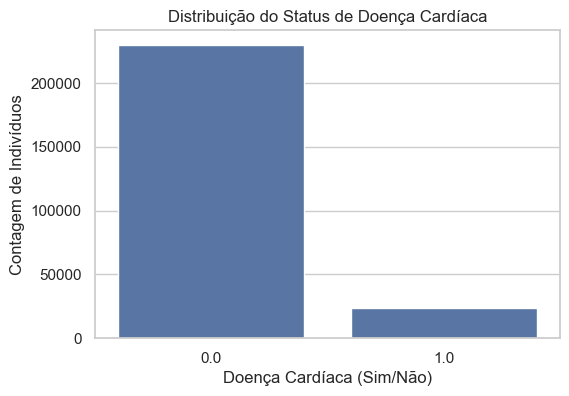

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


In [12]:
# --- 1. Gráfico da Variável Alvo ---
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDiseaseorAttack', data=base)
plt.title('Distribuição do Status de Doença Cardíaca')
plt.xlabel('Doença Cardíaca (Sim/Não)')
plt.ylabel('Contagem de Indivíduos')
plt.show()
print(base['HeartDiseaseorAttack'].value_counts())

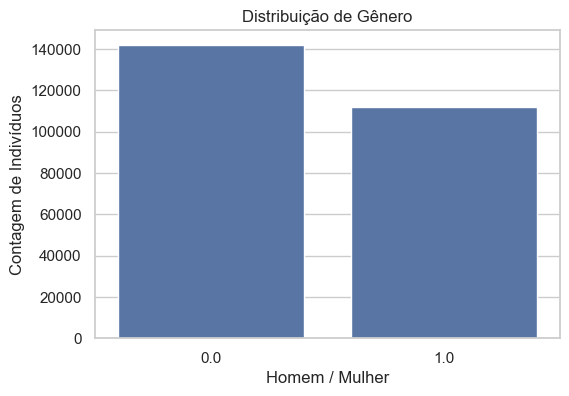

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64


In [13]:
# --- 2. Gráfico de Gênero ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=base)
plt.title('Distribuição de Gênero')
plt.xlabel('Homem / Mulher')
plt.ylabel('Contagem de Indivíduos')
plt.show()
print(base['Sex'].value_counts())

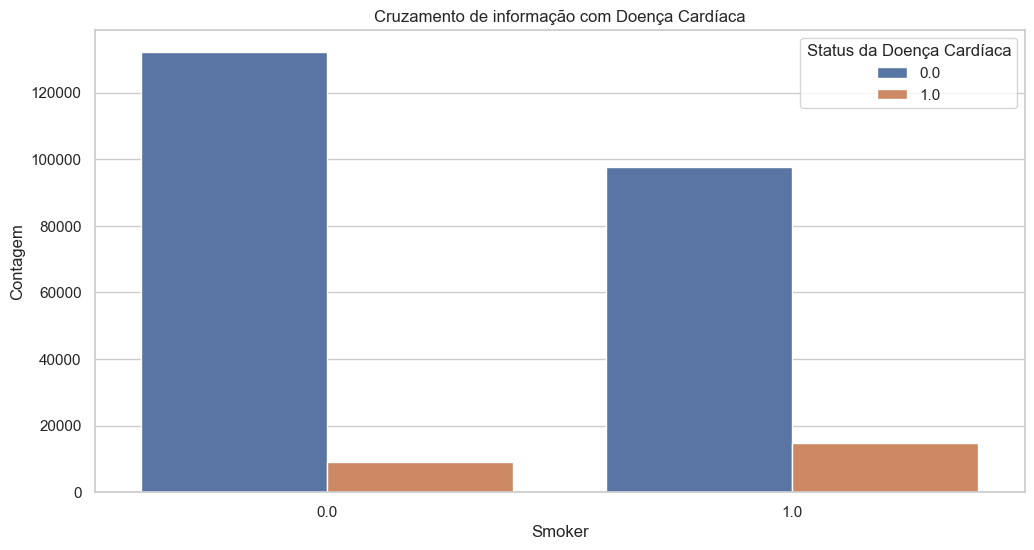

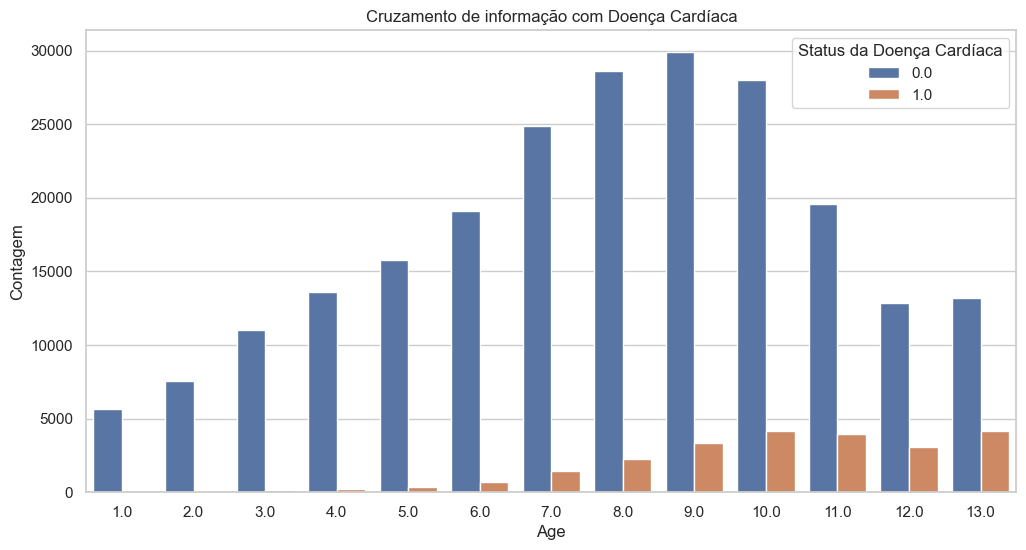

In [20]:
# --- 4. Relação entre Variáveis Numéricas e a Variável Alvo (Boxplots Divididos) ---
# Escolha algumas colunas numéricas para comparar com 'Heart Disease Status'
numerical_cols_for_relation_plot = ['Smoker', 'Age']

for col in numerical_cols_for_relation_plot:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=base, x=col, hue='HeartDiseaseorAttack')
    plt.title('Cruzamento de informação com Doença Cardíaca')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.legend(title='Status da Doença Cardíaca')
    plt.show()

#### Iniciando a conversão de variáveis categóricas para numéricas

In [23]:
base.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


<Axes: >

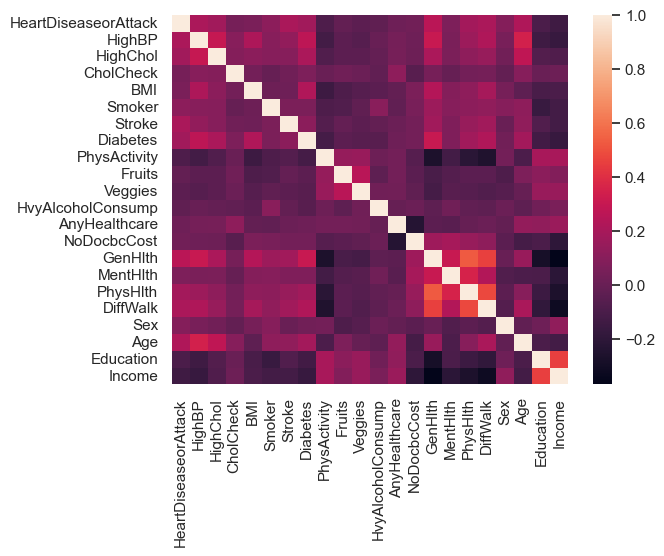

In [22]:
sns.heatmap(base.corr())

### O que o Heatmap nos diz sobre o Dataset:

1. **Cores:**
    * **Pretro Intenso:** Correlação fraca ou inexistente
    * **Vermelho Intenso:** Correlação negativa forte (enquanto uma variável aumenta, a outra diminui).
    * **Cores Próximas ao Branco/Cinza:** Correlação positiva forte (as variáveis aumentam ou diminuem juntas).

2. **Valores (`annot=True`):** Os números em cada célula são os coeficientes de correlação (Pearson, por padrão), variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita).

3.  **Correlações com a Variável Alvo (`HeartDiseaseorAttack`):**
    A primeira linha e coluna são as mais importantes para a nossa variável alvo.
    * **As features mais correlacionadas positivamente com `HeartDiseaseorAttack` são (em ordem decrescente de correlação, aproximadamente):**
        * `GenHlth` (Saúde Geral): 0.258383 - Correlação mais forte. Isso sugere que a percepção de saúde geral ruim está fortemente associada a ter doença cardíaca.
        * `Age` (Idade): 0.221618 - É um fator de risco conhecido.
        * `DiffWalk` (Dificuldade para Caminhar): 0.212709.
        * `HighBP` (Pressão Alta): 0.209361 - Fator de risco muito importante.
        * `Stroke` (Derrame) 0.203002.
        * `PhysHlth` (Saúde Física Ruim): 0.181698.
        * `HighChol` (Colesterol Alto): 0.180765 - Outro fator de risco conhecido.
        * `Diabetes`: 0.180272.
        * `Smoker` (Fumante): 0.114441.
        * `BMI` (IMC): 0.052904.
    * **Correlações Negativas/Muito Fracas com `HeartDiseaseorAttack`:**
        * `Fruits`, `Veggies`, `PhysActivity`, `Education`, `Income`: Estas têm correlações negativas ou próximas de zero. Isso faz sentido, pois bons hábitos e maior escolaridade/renda tendem a estar associados a menor risco de doença cardíaca.
        * `HvyAlcoholConsump`, `AnyHealthcare`, `NoDocbcCost`, `CholCheck`, `Sex`: Também têm correlações muito baixas com a doença cardíaca, sugerindo uma relação linear fraca.

4.  **Correlações entre as Features (Multicolinearidade Potencial):**
    * **`GenHlth` (Saúde Geral):** É altamente correlacionada com `PhysHlth` (Saúde Física Ruim) em 0.524364. Isso faz todo sentido, pois a saúde física ruim contribui para uma percepção de saúde geral ruim. Também tem correlações moderadas com `Age`, `HighBP`, `BMI`, `DiffWalk`.
    * **`PhysHlth` e `MentHlth`:** Têm uma correlação positiva moderada (0.353619), indicando que problemas de saúde física e mental podem coexistir.
    * **`Education` e `Income`:** Fortemente correlacionadas (0.449106). É um padrão comum, pois níveis mais altos de educação geralmente levam a maiores rendas.
    * **`HighBP` e `HighChol`:** Têm uma correlação positiva (0.298199), o que é biologicamente esperado, pois são fatores de risco interligados.
    * **`Age`:** Correlaciona-se com diversos fatores de risco como `HighBP`, `HighChol`, `GenHlth`, `PhysHlth`, o que é natural.

### **Implicações para o Projeto:**

* **Fatores de Risco Chave:** As variáveis `GenHlth`, `Age`, `DiffWalk`, `HighBP`, `Stroke`, `PhysHlth` e `HighChol` são os preditores mais promissores para o diagnóstico de doença cardíaca, pois apresentam as maiores correlações com a variável alvo.
* **Multicolinearidade Manejável:** Embora existam algumas correlações entre as features (como `GenHlth` e `PhysHlth`, ou `Education` e `Income`), elas não são extremamente altas (não chegam perto de 0.8 ou 0.9), o que geralmente não causa problemas severos para a maioria dos algoritmos de Machine Learning. Para modelos lineares, devemos ficar atentos, mas provavelmente não será um impeditivo.
* **Complexidade do Problema:** As correlações com a variável alvo não são extremamente fortes. Isso sugere que o diagnóstico de doença cardíaca não depende apenas de um ou dois fatores isolados, mas de uma **combinação complexa de múltiplas características**. Os modelos precisarão aprender essas interações para serem eficazes.



Gerando Pairplot com as colunas principais (isso pode levar alguns minutos)...


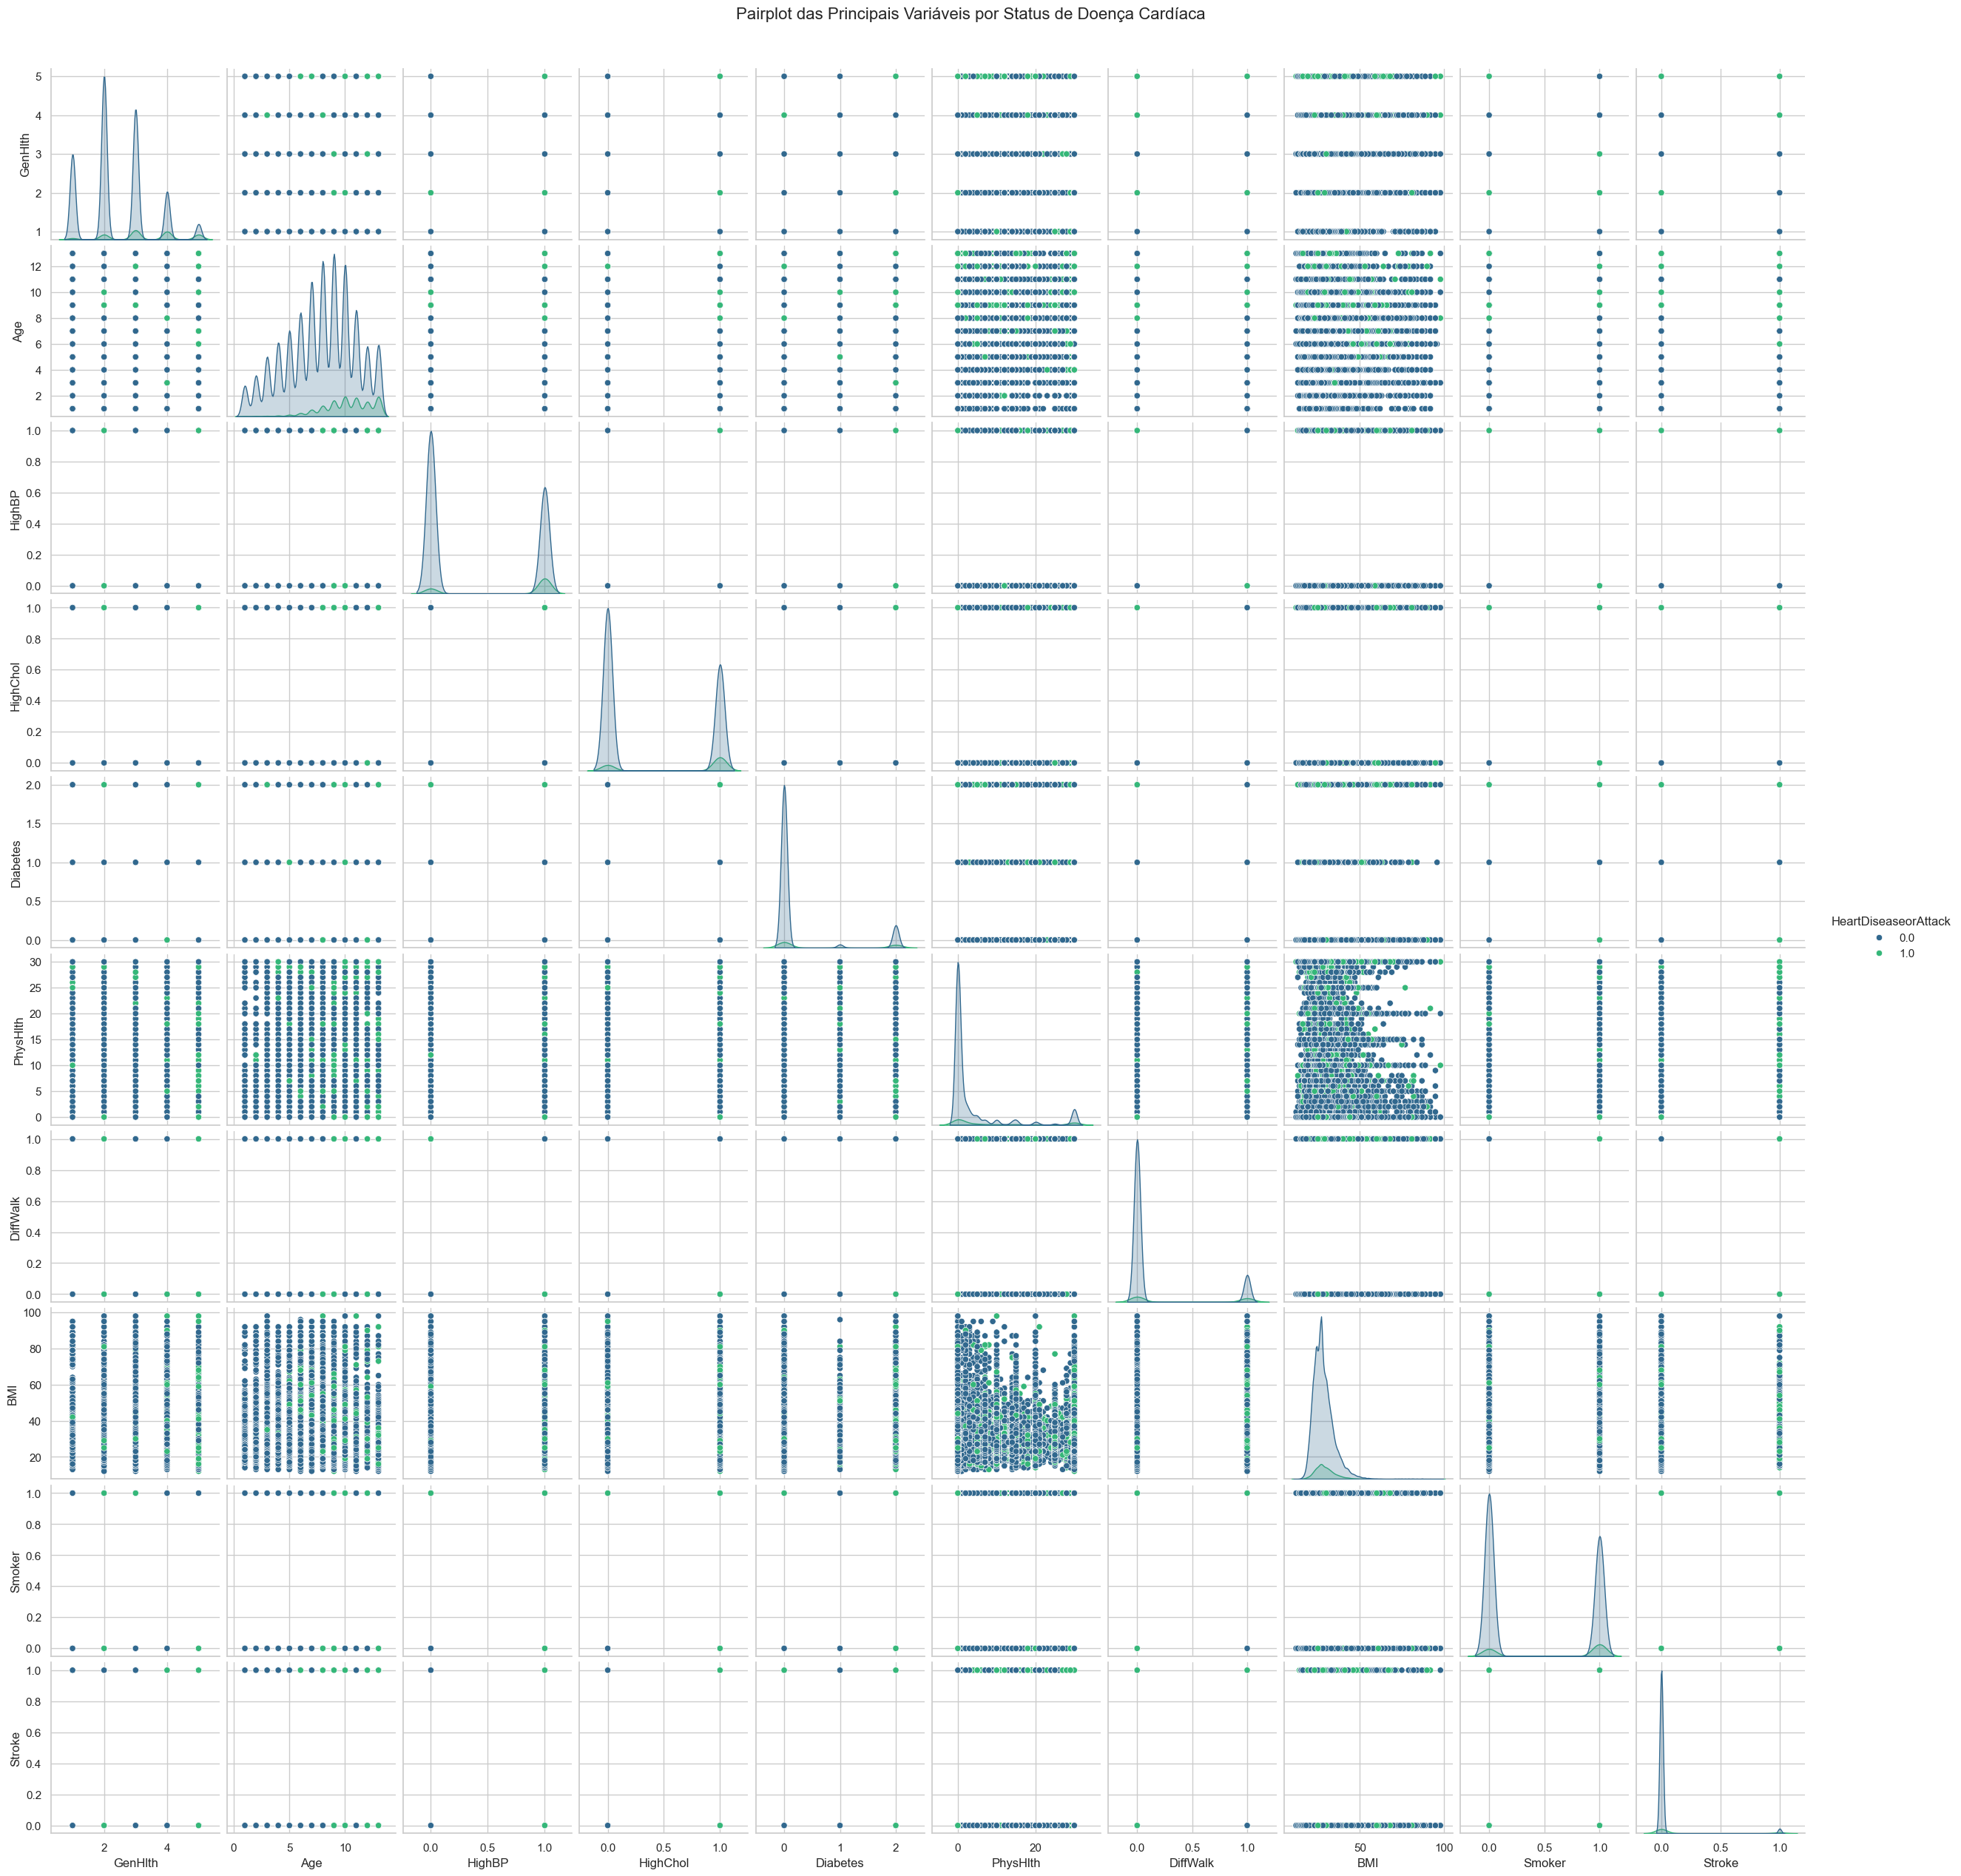

In [25]:
main_cols_for_pairplot = [
    'HeartDiseaseorAttack',
    'GenHlth',
    'Age',
    'HighBP',
    'HighChol',
    'Diabetes',
    'PhysHlth',
    'DiffWalk',
    'BMI',
    'Smoker',
    'Stroke'
]

print("Gerando Pairplot com as colunas principais (isso pode levar alguns minutos)...")
sns.pairplot(base[main_cols_for_pairplot], hue='HeartDiseaseorAttack', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot das Principais Variáveis por Status de Doença Cardíaca', y=1.02, fontsize=16)
plt.show()

---

## Análise detalhada utilizando Pandas Profiling

In [27]:
profile = ProfileReport(base, title="Relatório de Análise de Doença Cardíaca")
# profile.to_notebook_iframe()
profile.to_file("../../docs/heart_disease_report-v2.html")

python(94937) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 207.98it/s]


---

## Modelos

In [28]:
# quebrando o dataset em treino e teste
from sklearn.model_selection import train_test_split

X = base.drop('HeartDiseaseorAttack', axis=1)
y = base['HeartDiseaseorAttack']

x_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#importando os modelos de machine learning e as métricas de avaliação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [29]:
# treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino, y_treino)
print(f"Score KNN: {knn.score(x_treino, y_treino):.2f}")

python(95142) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Score KNN: 0.92


In [30]:
# treinando o modelo árvore de decisão
rfc = DecisionTreeClassifier(random_state=42)
rfc.fit(x_treino, y_treino)
print(f"Score árvore de decisão: {rfc.score(x_treino, y_treino):.2f}")

Score árvore de decisão: 1.00


In [31]:
# treinando o modelo de regressão logística
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(x_treino, y_treino)
print(f"Score Regressão Logística: {lr.score(x_treino, y_treino):.2f}")

Score Regressão Logística: 0.91


Acima podemos verificar o treinamento dos modelos utilizando o score, que indica a precisão do modelo nos dados de treino.

In [32]:
# testando os modelos
knn_pred = knn.predict(X_teste)
rfc_pred = rfc.predict(X_teste)
lr_pred = lr.predict(X_teste)

In [33]:
# avaliando os modelos pela matriz de confusão
print(f"Matrix Confusão KNN: {confusion_matrix(y_teste, knn_pred)}")
print(f"Matrix Confusão Decision Tree: {confusion_matrix(y_teste, rfc_pred)}")
print(f"Matrix Confusão Logistic Regression: {confusion_matrix(y_teste, lr_pred)}")

Matrix Confusão KNN: [[44999   969]
 [ 4250   518]]
Matrix Confusão Decision Tree: [[41881  4087]
 [ 3452  1316]]
Matrix Confusão Logistic Regression: [[45460   508]
 [ 4139   629]]


Olhando pelo ponto de vista da matriz de confusão, podemos entender que o melhor modelo é a árvore de decisão, pois ele conseguiu prever mais pessoas com risco de infarto, que é o que queremos prever.

In [34]:
# avaliando os modelos pela acurácia
print(f"Acurácia KNN: {accuracy_score(y_teste, knn_pred):.2f}")
print(f"Acurácia Decision Tree: {accuracy_score(y_teste, rfc_pred):.2f}")
print(f"Acurácia Logistic Regression: {accuracy_score(y_teste, lr_pred):.2f}")

Acurácia KNN: 0.90
Acurácia Decision Tree: 0.85
Acurácia Logistic Regression: 0.91


Pela acurácia podemos observar que o modelo que teve mais acertos foi de Regressão Logistica

In [35]:
# avaliando os modelos pela presisão
print(f"Precisão KNN: {precision_score(y_teste, knn_pred):.2f}")
print(f"Precisão Decision Tree: {precision_score(y_teste, rfc_pred):.2f}")
print(f"Precisão Logistic Regression: {precision_score(y_teste, lr_pred):.2f}")

Precisão KNN: 0.35
Precisão Decision Tree: 0.24
Precisão Logistic Regression: 0.55


Acima conseguimos confirmar que até o momento o modelo de árvore de decisão continua sendo o melhor modelo para o que queremos prever.

In [36]:
# avaliando os modelos pelo recall
print(f"Recall KNN: {recall_score(y_teste, knn_pred):.2f}")
print(f"Recall Decision Tree: {recall_score(y_teste, rfc_pred):.2f}")
print(f"Recall Logistic Regression: {recall_score(y_teste, lr_pred):.2f}")

Recall KNN: 0.11
Recall Decision Tree: 0.28
Recall Logistic Regression: 0.13


O recall confirma que o melhor modelo para o que queremos prever é a árvore de decisão.